# Sales Analysis



### Import Necessary Libraries

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task #1: Merging 12 months of sales data into a single file

In [2]:
# Merge the data sales
combined_csv = pd.concat([pd.read_csv(sales) for sales in glob.glob('./Sales_Data/*.csv')])

# Remove the rows that restate the column names
df_removed = combined_csv[combined_csv['Product']!='Product']

# Remove completely empty rows
df = df_removed[df_removed.notnull().all(axis=1)]

# Check to make sure there are no empty rows
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


Series([], dtype: float64)

Saving the 12 months as a .csv file.

In [3]:
df.to_csv('combined_sales.csv', index=False)

In [4]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


## Question 1: What was the best month for sales? How much was earned that month?

This was my original approach. <br /><br />
Although it worked, I ended up not using it because it was too complicated and Keith Galli's approach was much quicker and easier.

In [5]:
# month_list = []

# for date in df.loc[:,'Order Date']:
#     month = date[:2]
#     month_list.append(month)

# months = pd.Series(month_list)
# df['Months'] = months.values


This was Galli's approach. It is done in one line, but I do not know how to remove the 'SettingWithCopyWarning'

In [6]:
# Add 'Month' column to the df
df['Month'] = df['Order Date'].str[:2]

# Convert 'Month' column to number instead of string
df['Month'] = df['Month'].astype(int)

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Now that the month column has been added, we should multiply the 'Price Each' column with the 'Quantity Ordered' column to figure out how much was made on each order.

In [7]:
# Convert 'Quantity Ordered' 
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
# Convert 'Price Each' to float
df['Price Each'] = pd.to_numeric(df['Price Each'])


# Add 'Sales' column
df['Sales'] = df['Quantity Ordered']*df['Price Each']

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

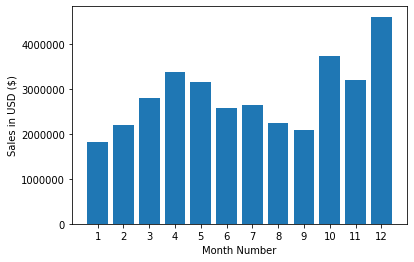

In [8]:
results = df.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')

plt.show()

### Results

This shows that the highest amount of sales is in December, and the lowest amount of sales is in January.

 <br />

## Question 2: What city had the highest number of sales?

My first approach was to add a 'Zip Code' column from the address.

In [9]:
# Add 'Zip Code' column to identify cities
# df['Zip Code'] = df['Purchase Address'].str[-5:]

In [10]:
# Groupby to show the sales of each zip code
# df.groupby('Zip Code').sum()

In [11]:
# Groupby to show the sales in ascending order
# df.groupby('Zip Code').sum().sort_values(by='Sales')


This shows that 94016 had the highest sales. <br />

However, I also thought about splitting the 'Purchase Address' column by ', ' to get the city.

In [12]:
# cities = []

# for i in df['Purchase Address'].str.split(', '):
#     cities.append(i[1])
    
# df['City'] = cities

In [13]:
# # Groupby to show the sales of each zip code
# df.groupby('City').sum()

# # Groupby to show the sales in ascending order
# df.groupby('City').sum().sort_values(by='Sales')

I got a different answer when I used the split() method than when I added the zip code. <br />
##### The reason why I got a different answer was because the dataset had both 'Portland, Maine' and 'Portland, Oregon' <br />

Galli used the apply() method, so I will follow his to see what answer he comes up with.

In [14]:
# Using .apply()
# df['City*'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1])

We could not just get the city name because there was an issue of a duplicate of city names in the dataset.

In [15]:
# My approach
def get_city(address):
    city = address.split(', ')[1]
    state = address.split(', ')[2]
    return city+', '+state[:2]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
# # Galli's approach
# def get_city(address):
#     return address.split(',')[1]

# def get_state(address):
#     return address.split(',')[2].split(' ')[1]

# df['City'] = df['Purchase Address'].apply(lamba x: get city(x)+''+get_state(x))

# # Using 'f strings'
# df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}")

In [17]:
# sales = df.groupby('City').sum().sort_values(by='Sales')
sales = df.groupby('City').sum()

sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


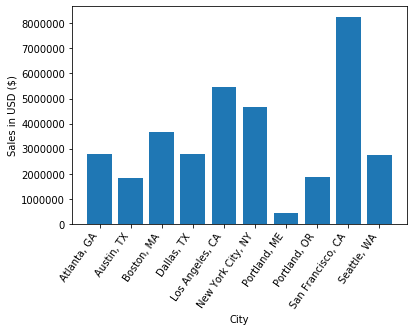

In [18]:
cities = sales.index.to_list()

# plt.figure(figsize=(20, 10))

plt.bar(cities, sales['Sales'])
plt.xticks(cities, rotation=55, ha='right')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')

plt.show()

### Results

This shows that San Fransisco, CA has the highest number of sales, and Portland, ME has the lowest number of sales.

<br /> 

## Question 3: What time should we display advertisements to maximize the likelihood of a customer buying a product?

In order to answer this, we could look at the 'Order Date' column and see how we can aggregate the data and show it over a 24-hour period.

In [19]:
# Convert 'Order Date' column to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Add an 'Hour' column
df['Hour'] = df['Order Date'].dt.hour

# Add a 'Minute' column
df['Minute'] = df['Order Date'].dt.minute

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


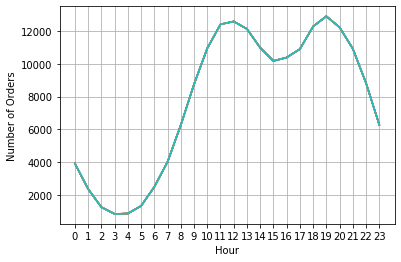

In [21]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()


plt.show()

### Results

This shows that the peaks of sales is between 10am-12pm and 6pm-8pm. <br />

Another thing I could do is break it up by the specific city to show the best times for those cities.

 <br />

## Question 4: What products are most often sold together?

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [23]:
# Find duplicates of the 'Order ID'
order_df = df[df['Order ID'].duplicated(keep=False)]

order_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32


In [24]:
# Create a new 'Grouped' column that has all the items ordered with the same Order ID
order_df['Grouped'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Keep only the 'Order ID' and 'Grouped' column and drop duplicate rows
order_df = order_df[['Order ID', 'Grouped']].drop_duplicates()

/Users/johngonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
order_df.head()

,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [26]:
count = Counter()

# Find the number of instances where two items are in the same list
for row in order_df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# count.most_common(10)

for key, value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


### Results

The two items sold together the most are the iPhone and Lighting Charging Cable. The second two most sold items are the Google Phoen and a USB-C Charging Cable.

 <br />

## Question 5: What product sold the most? Why do you think it sold the most?

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


My method

In [28]:
df.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


Galli's method

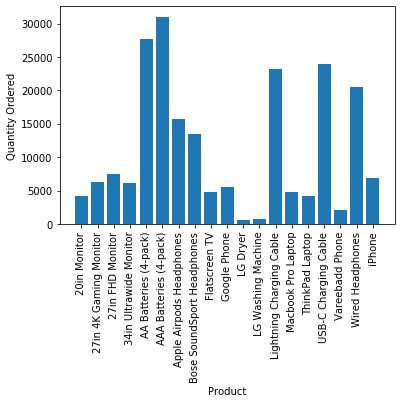

In [29]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=10)

plt.show()

One possible reason why AAA Batteries were sold much more than LG dryer is because of the price. AAA Batteries are much cheaper than an LG Dryer. <br />

In order to prove this hypothesis, we can plot the prices of each product and see how it correlates with the quantity ordered.

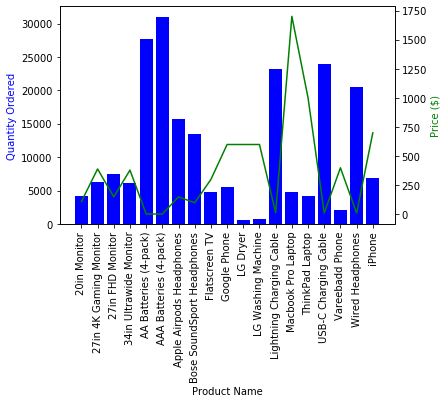

In [30]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, 'g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='g')

ax1.set_xticklabels(products, rotation='vertical', size=10)

plt.show()